<a href="https://colab.research.google.com/github/ShuboLiu/MyColabSampless/blob/main/CosineSimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insight of Cosine Similarity MAE

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls gdrive/MyDrive/temp/

eval.json


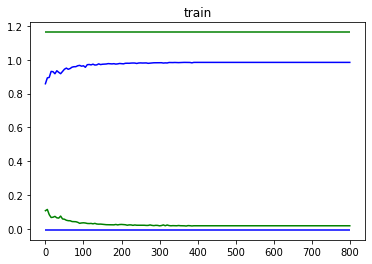

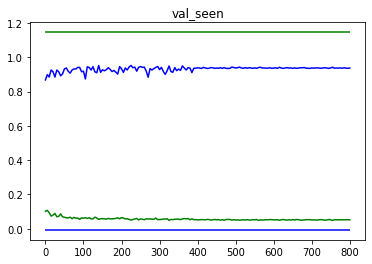

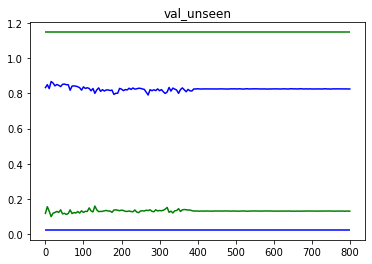

In [ ]:
import json, os
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

with open('/content/gdrive/MyDrive/temp/eval.json') as file:
  content = json.load(file)
with open('/content/gdrive/MyDrive/temp/eval_mae_notraining.json') as file:
  content_MAE_notraning = json.load(file)

similarity_unseen = []
similarity_seen = []
similarity_train = []
loss_unseen = []
loss_seen = []
loss_train = []

splits = ['train', 'val_seen', 'val_unseen']
for split in splits:
  similarity = []
  loss = []
  data = content['R2R_{}_enc'.format(split)]
  for key in data.keys():
    similarity.append(float(data[key]['cos_loss']))
    loss.append(float(data[key]['l2_loss']))
  
  x = np.arange(len(similarity))*5
  y_1 = similarity
  y_2 = loss
  
  plt.plot(x, y_1, color='blue')
  plt.plot(x, y_2, color='green')
  plt.hlines(content_MAE_notraning['R2R_{}_enc'.format(split)]['NONE']['l2_loss'], xmin=min(x), xmax=max(x), color='green')
  plt.hlines(content_MAE_notraning['R2R_{}_enc'.format(split)]['NONE']['cos_loss'], xmin=min(x), xmax=max(x), color='blue')

  plt.title("{}".format(split))
  plt.show() 


绿色：L2 Loss
蓝色：Cosine Similarity
横线：MAE开始训练前预测的结果与GT的对比【可当作Random Noise Baseline】

这里可以看出Loss和Cosine Similarity的结果都是较为正常的：
1. 在Train上的Loss呈现下降状态，而相比之下Cosine Similarity呈现上升效果。这体现模型具有较好的收敛效果
2. 在Eval_seen结果上整体与Train上的结果保持一致。
3. 与之形成鲜明对比的Val_unseen：Similarity先上升后逐渐下降。这反映了随着训练Epoch数量的增加，模型泛化性能逐步降低。

但是为什么会在Epoch=5这么快的地方到达峰值值得进一步深思。造成这一现象的潜在原因包括：
1. 模型太大了？相比于MAE的ImageNet图像输入而言，我们的Feature Mean输入数据量显著低，因此模型是不是也应该相对应地减小？
2. 应当进一步测试 Epoch=15 附近在DUET模型中的预测效果